In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.svm import SVR
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
Food_Supply_Quantity_kg_dataset = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [3]:
Food_Supply_Quantity_kg_data = Food_Supply_Quantity_kg_dataset.fillna(0)
Food_Supply_Quantity_kg = Food_Supply_Quantity_kg_data.replace("<2.5", 2.5)
Food_Supply_Quantity_kg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.005707,0.000168,0.000683,0.004855,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.027047,0.001085,0.016445,0.009517,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.009229,0.001037,0.004099,0.004094,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000086,0.000006,0.000022,0.000057,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,0,0.024742,0.003093,0.011340,0.010309,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.001168,0.000056,0.000498,0.000614,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000282,0.000000,0.000229,0.000053,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.000021,0.000007,0.000003,0.000010,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.000593,0.000017,0.000308,0.000269,17861000.0,%


In [4]:
X = Food_Supply_Quantity_kg[['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter','Miscellaneous','Offals','Oilcrops','Pulses','Spices','Starchy Roots','Stimulants','Sugar & Sweeteners','Sugar Crops','Treenuts','Vegetable Oils','Vegetables','Vegetal Products','Obesity','Population']]

y = Food_Supply_Quantity_kg['Deaths']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train the model using the training sets and check score on test dataset
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

-9.90798177849743
-15.47381146049804


In [7]:
svr.fit(X_train, y_train)
predicted= svr.predict(X_test)

In [8]:
# predict the target on the test dataset
predict_train_svr = svr.predict(X_train)
print('\n... on training data',predict_train_svr) 

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train_svr)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test_svr = svr.predict(X_test)
print('\n... on test data',predict_test_svr) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test_svr)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


... on training data [0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842 0.03313842
 0.03313842 0.03313842 0.03313842 0.0331

In [9]:
pred_train_svr= svr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_svr)))
print(r2_score(y_train, pred_train_svr))

pred_test_svr= svr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_svr))) 
print(r2_score(y_test, pred_test_svr))

0.031332745478818994
-9.90798177849743
0.03148483207774258
-15.473811460498041


In [10]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.009374390433100876
RMSE value for k=  2 is: 0.008960129135994106
RMSE value for k=  3 is: 0.00813779633154126
RMSE value for k=  4 is: 0.007609301839610389
RMSE value for k=  5 is: 0.007821779051203792
RMSE value for k=  6 is: 0.007896931160414823
RMSE value for k=  7 is: 0.006978603310329463
RMSE value for k=  8 is: 0.007080352785708506
RMSE value for k=  9 is: 0.007268227917357725
RMSE value for k=  10 is: 0.007366369325960088
RMSE value for k=  11 is: 0.007567912404808761
RMSE value for k=  12 is: 0.0077055147443909925
RMSE value for k=  13 is: 0.007903696286558765
RMSE value for k=  14 is: 0.00793624494682378
RMSE value for k=  15 is: 0.007938747306126698
RMSE value for k=  16 is: 0.00777680723614515
RMSE value for k=  17 is: 0.007808679705840086
RMSE value for k=  18 is: 0.007818676970321072
RMSE value for k=  19 is: 0.007798796886311141
RMSE value for k=  20 is: 0.007911078676661161
RMSE value for k=  21 is: 0.007849251721520806
RMSE value for k=  22 is

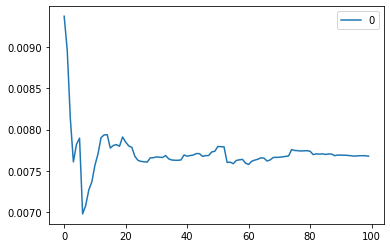

In [12]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [13]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

0.007678459915063618

In [14]:
predictions = model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'degrees.')

Mean Absolute Error: 0.00403 degrees.


In [15]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 27)

In [16]:
model_knn.fit(X_train, y_train)  #fit the model
pred=model_knn.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= ' , 27 , 'is:', error)

RMSE value for k=  27 is: 0.007610317436397204


In [17]:
from sklearn.cluster import KMeans

In [18]:
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)

In [19]:
model = KMeans()  

# fit the model with the training data
model.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# Number of Clusters
print('\nDefault number of Clusters : ',model.n_clusters)


Default number of Clusters :  8


In [21]:
# predict the clusters on the train dataset
predict_train = model.predict(train_data)
print('\nCLusters on train data',predict_train) 


CLusters on train data [6 4 5 1 4 5 4 4 5 4 4 4 4 4 2 1 4 0 1 2 4 1 4 4 1 1 4 4 4 5 4 4 4 4 4 2 4
 5 1 7 4 3 1 1 4 4 1 4 4 1 5 4 4 1 4 1 1 1 4 4 4 4 4 5 4 4 4 1 1 5 4 5 5 1
 5 4 4 4 4 1 4 1 1 3 3 4 4 4 4 4 4 4 4 7 4 4 4 4 4 4 4 1 5 4 4 4 1 4 1 4 3
 4 4 1 4 4 4 5 4 4 5 4 4 1 4 4 4 5 3 1 7 5 4 4 1 4]


In [22]:
# predict the target on the test dataset
predict_test = model.predict(test_data)
print('Clusters on test data',predict_test)

Clusters on test data [4 0 4 1 4 1 3 5 5 1 4 4 4 4 0 4 1 4 4 1 4 4 5 4 4 4 5 4 2 4 4 3 4 4]


In [23]:
# Now, we will train a model with n_cluster = 3
model_n3 = KMeans(n_clusters=3)

# fit the model with the training data
model_n3.fit(train_data)

# Number of Clusters
print('\nNumber of Clusters : ',model_n3.n_clusters)

# predict the clusters on the train dataset
predict_train_3 = model_n3.predict(train_data)
print('\nCLusters on train data',predict_train_3) 

# predict the target on the test dataset
predict_test_3 = model_n3.predict(test_data)
print('Clusters on test data',predict_test_3) 


Number of Clusters :  3

CLusters on train data [1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 1 0 0 0 0 0]
Clusters on test data [0 1 0 0 0 0 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0]
